In [1]:
import numpy as np  
import pandas as pd  
import os
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

 # **Visualizing all the classes**

In [2]:
path = "/kaggle/input/gtsrb-german-traffic-sign/Meta/"
class_image_name = os.listdir(path)
print(class_image_name)

['37.png', '35.png', '11.png', '31.png', '4.png', '40.png', '33.png', '9.png', '.~lock.ClassesInformation.ods#', '14.png', '1.png', '39.png', '20.png', '38.png', '2.png', '10.png', '36.png', '18.png', '21.png', '12.png', '28.png', '22.png', '34.png', '41.png', '.~lock.ClassesInformationStrong.ods#', '7.png', '29.png', '17.png', '5.png', '3.png', '16.png', '8.png', '24.png', '32.png', '6.png', '23.png', '15.png', '30.png', '27.png', '13.png', '25.png', '0.png', '19.png', '26.png', '42.png']


In [3]:
class_image_name = ['0.png','1.png','2.png','3.png','4.png','5.png', '6.png', '7.png', '8.png', '9.png','10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png','30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png','40.png', '41.png', '42.png']
print(class_image_name)

['0.png', '1.png', '2.png', '3.png', '4.png', '5.png', '6.png', '7.png', '8.png', '9.png', '10.png', '11.png', '12.png', '13.png', '14.png', '15.png', '16.png', '17.png', '18.png', '19.png', '20.png', '21.png', '22.png', '23.png', '24.png', '25.png', '26.png', '27.png', '28.png', '29.png', '30.png', '31.png', '32.png', '33.png', '34.png', '35.png', '36.png', '37.png', '38.png', '39.png', '40.png', '41.png', '42.png']


In [4]:
class_image = []
for name in class_image_name:
    file_path = os.path.join(path,name)
    image = Image.open(file_path)
    print(image.size)
    class_image.append(image)

(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 88)
(100, 100)
(100, 89)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 88)
(100, 88)
(100, 88)
(100, 88)
(100, 88)
(100, 88)
(100, 88)
(100, 88)
(100, 88)
(100, 87)
(100, 88)
(100, 88)
(100, 88)
(100, 88)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)
(100, 100)


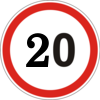

In [5]:
class_image[0]

In [6]:
class_label = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',      
'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)','Speed limit (120km/h)',     
'No passing','No passing veh over 3.5 tons','Right-of-way at intersection','Priority road','Yield','Stop','No vehicles',       
'Veh > 3.5 tons prohibited','No entry','General caution','Dangerous curve left','Dangerous curve right',   
'Double curve','Bumpy road','Slippery road','Road narrows on the right','Road work','Traffic signals',      
'Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow','Wild animals crossing',      
'End speed + passing limits','Turn right ahead','Turn left ahead','Ahead only',      
'Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory','End of no passing',      
'End no passing veh > 3.5 tons' ]

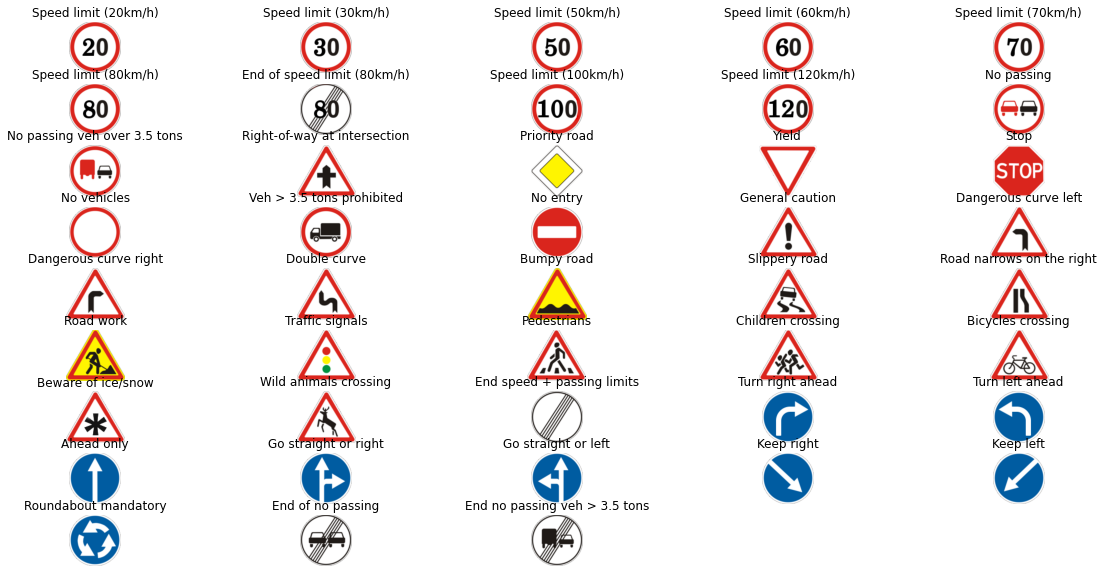

In [7]:
#https://www.geeksforgeeks.org/how-to-display-multiple-images-in-one-figure-correctly-in-matplotlib/
fig = plt.figure(figsize=(20, 10))
for count in range(len(class_image)):
    fig.add_subplot(9, 5,count+1)
    plt.imshow(class_image[count])
    plt.title(class_label[count])
    plt.axis('off')

## observations - 

1. Here there are 43 class of the label
2. The size of the image are 100 X 100 or 100 X 88/89, so we will resize to 30 X 30 so that image remain of uniform size and model converges fast 

# Model 1 - Image size 30 X 30

## Data Reading and Data preperation

In [8]:
train_path = "/kaggle/input/gtsrb-german-traffic-sign/train/"
train_images = []
train_labels = []

for i in range(43): #as there are 43 classes
    temp = os.path.join(train_path,str(i))
    image_names = os.listdir(temp)
    for name in image_names:
        try:
            image = Image.open(os.path.join(temp,name))
            image = image.resize((30,30))
            image = np.array(image)
            train_images.append(image)
            train_labels.append(i)
        except:
            print("Error loading image")

In [9]:
print("The number of images in the dataset",len(train_images))

The number of images in the dataset 39209


<AxesSubplot:title={'center':'Distribution of image per class label'}, xlabel='Class label', ylabel='Number of image for class label'>

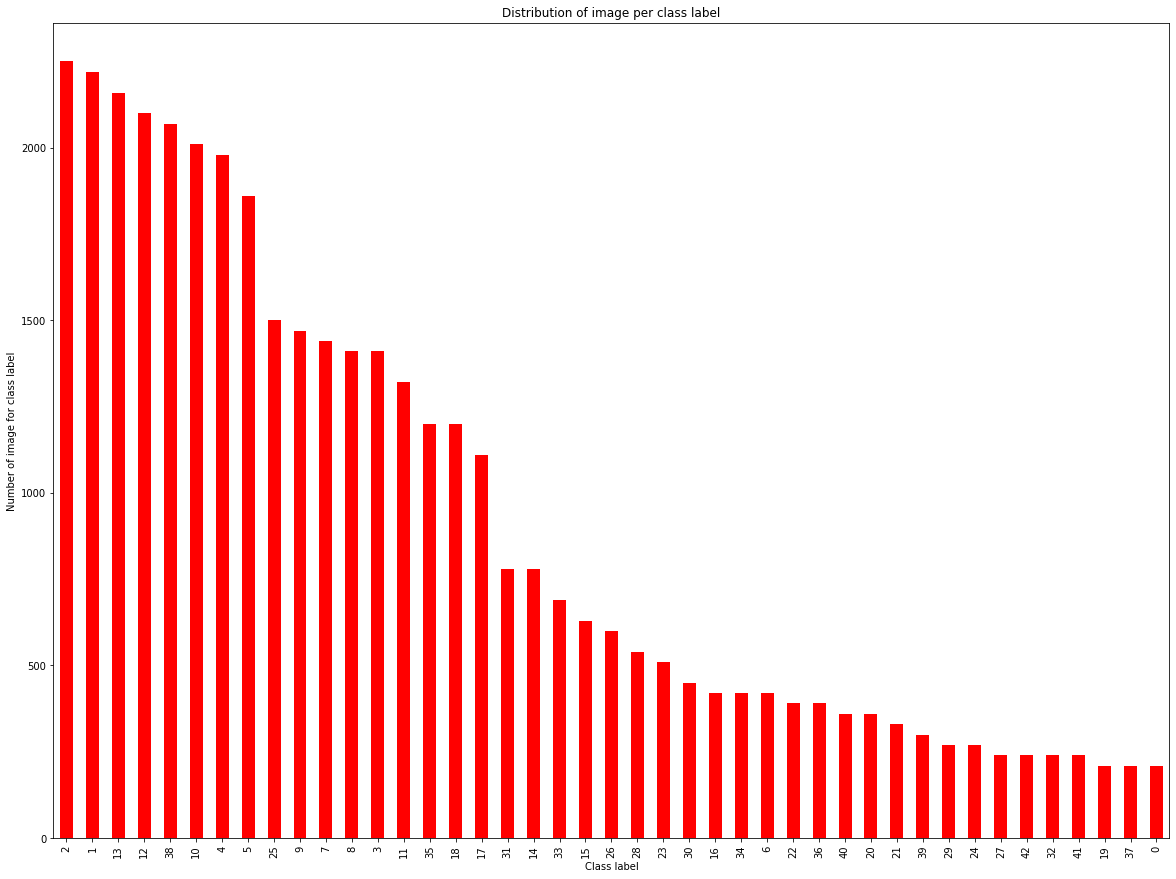

In [10]:
pd.Series(train_labels).value_counts().plot(kind="bar",figsize=(20,15),title="Distribution of image per class label",ylabel="Number of image for class label",xlabel="Class label",colormap = "autumn")

# Training data and validation data

In [11]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [12]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images,train_labels, test_size=0.2, random_state=42)

In [13]:
print("The number of images in Training dataset",X_train.shape[0])
print("The number of images in validation dataset",X_valid.shape[0])

The number of images in Training dataset 31367
The number of images in validation dataset 7842


## Converting the labels into one hot encoding

In [14]:
y_train = to_categorical(y_train, 43)
y_valid = to_categorical(y_valid, 43)

# Building the model

In [15]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_valid, y_valid))
model.save("my_model_30.h5")

Epoch 1/15
981/981 [==============================] - 73s 74ms/step - loss: 3.4359 - accuracy: 0.2705 - val_loss: 0.7125 - val_accuracy: 0.8072
Epoch 2/15
981/981 [==============================] - 73s 74ms/step - loss: 1.1696 - accuracy: 0.6573 - val_loss: 0.4252 - val_accuracy: 0.8868
Epoch 3/15
981/981 [==============================] - 73s 74ms/step - loss: 0.9042 - accuracy: 0.7311 - val_loss: 0.2993 - val_accuracy: 0.9126
Epoch 4/15
981/981 [==============================] - 72s 74ms/step - loss: 0.6764 - accuracy: 0.7966 - val_loss: 0.1955 - val_accuracy: 0.9454
Epoch 5/15
981/981 [==============================] - 71s 73ms/step - loss: 0.5266 - accuracy: 0.8398 - val_loss: 0.1508 - val_accuracy: 0.9615
Epoch 6/15
981/981 [==============================] - 72s 74ms/step - loss: 0.4275 - accuracy: 0.8735 - val_loss: 0.1397 - val_accuracy: 0.9606
Epoch 7/15
981/981 [==============================] - 72s 74ms/step - loss: 0.4137 - accuracy: 0.8765 - val_loss: 0.1391 - val_accuracy:

# plot of accuracy

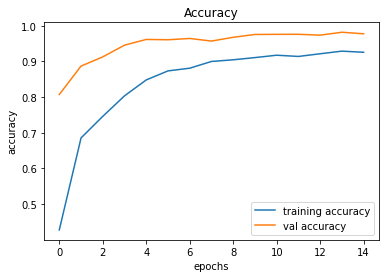

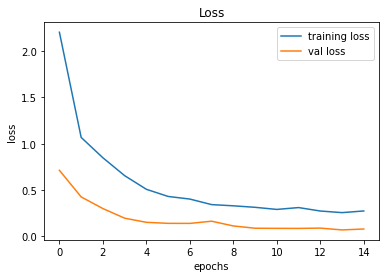

In [17]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Observation - 


we can see that our model is not overfitting

# Testing model on test data

In [18]:
y_test = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

test_labels = y_test["ClassId"].values
test_image_path = y_test["Path"].values

In [19]:
test_image_path

array(['Test/00000.png', 'Test/00001.png', 'Test/00002.png', ...,
       'Test/12627.png', 'Test/12628.png', 'Test/12629.png'], dtype=object)

In [20]:
test_data = []
test_path = "/kaggle/input/gtsrb-german-traffic-sign"
for img_name in test_image_path:
    img_path =  os.path.join(test_path,img_name)
    image = Image.open(img_path)
    image = image.resize((30,30))
    test_data.append(np.array(image))

In [21]:
X_test=np.array(test_data)

pred = model.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [22]:
print(accuracy_score(test_labels, pred))

0.9357878068091845


# Model 2 - Image size 50 x 50

## Data Reading and Data preperation

In [23]:
train_path = "/kaggle/input/gtsrb-german-traffic-sign/train/"
train_images = []
train_labels = []

for i in range(43): #as there are 43 classes
    temp = os.path.join(train_path,str(i))
    image_names = os.listdir(temp)
    for name in image_names:
        try:
            image = Image.open(os.path.join(temp,name))
            image = image.resize((50,50))
            image = np.array(image)
            train_images.append(image)
            train_labels.append(i)
        except:
            print("Error loading image")

In [24]:
print("The number of images in the dataset",len(train_images))

The number of images in the dataset 39209


# Training data and validation data

In [25]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images,train_labels, test_size=0.2, random_state=42)

In [27]:
print("The number of images in Training dataset",X_train.shape[0])
print("The number of images in validation dataset",X_valid.shape[0])

The number of images in Training dataset 31367
The number of images in validation dataset 7842


## Converting the labels into one hot encoding

In [28]:
y_train = to_categorical(y_train, 43)
y_valid = to_categorical(y_valid, 43)

# Building the model

In [29]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compilation of the model

In [30]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_valid, y_valid))
model.save("my_model_50.h5")

Epoch 1/15
981/981 [==============================] - 247s 252ms/step - loss: 3.0766 - accuracy: 0.4694 - val_loss: 0.2562 - val_accuracy: 0.9464
Epoch 2/15
981/981 [==============================] - 247s 252ms/step - loss: 0.4849 - accuracy: 0.8600 - val_loss: 0.1261 - val_accuracy: 0.9699
Epoch 3/15
981/981 [==============================] - 247s 251ms/step - loss: 0.3351 - accuracy: 0.9001 - val_loss: 0.0687 - val_accuracy: 0.9832
Epoch 4/15
981/981 [==============================] - 246s 251ms/step - loss: 0.2687 - accuracy: 0.9214 - val_loss: 0.0719 - val_accuracy: 0.9839
Epoch 5/15
981/981 [==============================] - 245s 250ms/step - loss: 0.2466 - accuracy: 0.9248 - val_loss: 0.0579 - val_accuracy: 0.9856
Epoch 6/15
981/981 [==============================] - 246s 251ms/step - loss: 0.2156 - accuracy: 0.9349 - val_loss: 0.0564 - val_accuracy: 0.9865
Epoch 7/15
981/981 [==============================] - 245s 250ms/step - loss: 0.1847 - accuracy: 0.9436 - val_loss: 0.0617 -

# plot of accuracy

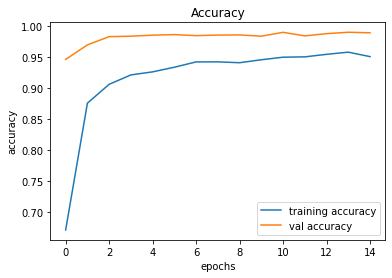

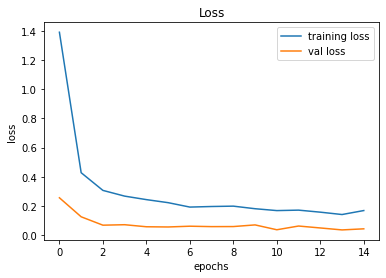

In [31]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Observation - 


we can see that our model is not overfitting

# Testing model on test data

In [32]:
y_test = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

test_labels = y_test["ClassId"].values
test_image_path = y_test["Path"].values

In [33]:
test_image_path

array(['Test/00000.png', 'Test/00001.png', 'Test/00002.png', ...,
       'Test/12627.png', 'Test/12628.png', 'Test/12629.png'], dtype=object)

In [34]:
test_data = []
test_path = "/kaggle/input/gtsrb-german-traffic-sign"
for img_name in test_image_path:
    img_path =  os.path.join(test_path,img_name)
    image = Image.open(img_path)
    image = image.resize((50,50))
    test_data.append(np.array(image))

In [35]:
X_test=np.array(test_data)

pred = model.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [36]:
print(accuracy_score(test_labels, pred))

0.9516231195566113


# Model 3 - Data augmenation 

# Data Reading and Data preperation

In [37]:
train_path = "/kaggle/input/gtsrb-german-traffic-sign/train/"
train_images = []
train_labels = []

for i in range(43): #as there are 43 classes
    temp = os.path.join(train_path,str(i))
    image_names = os.listdir(temp)
    for name in image_names:
        try:
            image = Image.open(os.path.join(temp,name))
            image = image.resize((30,30))
            image = np.array(image)
            train_images.append(image)
            train_labels.append(i)
        except:
            print("Error loading image")

In [38]:
print("The number of images in the dataset",len(train_images))

The number of images in the dataset 39209


# Training data and validation data

In [39]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(train_images,train_labels, test_size=0.2, random_state=42)

In [41]:
print("The number of images in Training dataset",X_train.shape[0])
print("The number of images in validation dataset",X_valid.shape[0])

The number of images in Training dataset 31367
The number of images in validation dataset 7842


## Converting the labels into one hot encoding

In [42]:
y_train = to_categorical(y_train, 43)
y_valid = to_categorical(y_valid, 43)

# Building the model

In [43]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

## Data Augmetation

In [44]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")
data = datagen.flow(X_train, y_train)

# Compilation of the model

In [45]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(data, batch_size = 32, epochs=epochs, validation_data=(X_valid, y_valid))
model.save("my_model_dataaug.h5")

Epoch 1/15
981/981 [==============================] - 79s 80ms/step - loss: 4.1411 - accuracy: 0.1421 - val_loss: 1.7868 - val_accuracy: 0.4452
Epoch 2/15
981/981 [==============================] - 78s 79ms/step - loss: 2.1532 - accuracy: 0.3577 - val_loss: 1.4836 - val_accuracy: 0.5397
Epoch 3/15
981/981 [==============================] - 78s 79ms/step - loss: 1.8453 - accuracy: 0.4234 - val_loss: 1.0729 - val_accuracy: 0.6540
Epoch 4/15
981/981 [==============================] - 78s 80ms/step - loss: 1.6145 - accuracy: 0.4859 - val_loss: 0.8395 - val_accuracy: 0.7374
Epoch 5/15
981/981 [==============================] - 78s 79ms/step - loss: 1.3171 - accuracy: 0.5876 - val_loss: 0.5802 - val_accuracy: 0.8119
Epoch 6/15
981/981 [==============================] - 78s 80ms/step - loss: 1.1039 - accuracy: 0.6549 - val_loss: 0.4211 - val_accuracy: 0.8667
Epoch 7/15
981/981 [==============================] - 78s 79ms/step - loss: 0.8957 - accuracy: 0.7171 - val_loss: 0.3080 - val_accuracy:

# plot of accuracy

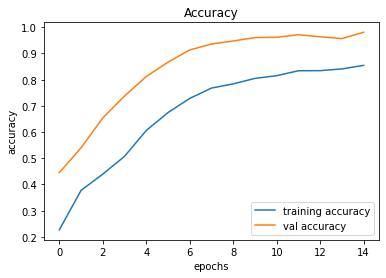

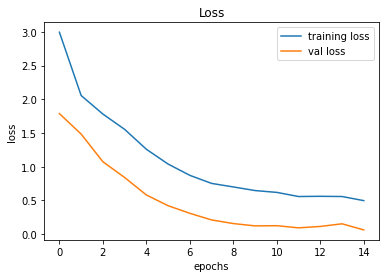

In [46]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Observation - 


we can see that our model is not overfitting

# Testing model on test data

In [47]:
y_test = pd.read_csv('/kaggle/input/gtsrb-german-traffic-sign/Test.csv')

test_labels = y_test["ClassId"].values
test_image_path = y_test["Path"].values

In [48]:
test_image_path

array(['Test/00000.png', 'Test/00001.png', 'Test/00002.png', ...,
       'Test/12627.png', 'Test/12628.png', 'Test/12629.png'], dtype=object)

In [49]:
test_data = []
test_path = "/kaggle/input/gtsrb-german-traffic-sign"
for img_name in test_image_path:
    img_path =  os.path.join(test_path,img_name)
    image = Image.open(img_path)
    image = image.resize((30,30))
    test_data.append(np.array(image))

In [50]:
X_test=np.array(test_data)

pred = model.predict_classes(X_test)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [51]:
print(accuracy_score(test_labels, pred))

0.9453681710213777
